# Notebook Summary

* This covers Multiclass Classification (10 food classes).

* The results are poor which can be improved by using complex architectures/transfer learning but this notebook contains a basic CNN architecture just to display basic working of a Multiclass Classification Model.

In [ ]:
import zipfile
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Unzipping the dataset

!unzip gdrive/My\ Drive/Colab\ Notebooks/CNN/10_food_classes_all_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: 10_food_classes_all_data/train/hamburger/2119225.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2119225.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/22923.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._22923.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/3894442.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._3894442.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/1101890.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._1101890.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2715888.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._2715888.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/554363.jpg  
  inflating: __MACOSX/10_food_classes_all_data/train/hamburger/._554363.jpg  
  inflating: 10_food_classes_all_data/train/hamburger/2100953.jpg  
  inf

In [ ]:
# Renaming the dataset folder for simplicity

In [ ]:
import os

In [ ]:
# Getting the class names
class_names = os.listdir("food_dataset/train")
class_names.sort()
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# Images per folder in training dir
print(len(os.listdir("food_dataset/train/chicken_curry")))

# Images per folder in testing dir
print(len(os.listdir("food_dataset/test/chicken_curry")))

750
250


In [ ]:
# Training and testing dir vars

train_dir = "food_dataset/train/" 

test_dir = "food_dataset/test/"

In [ ]:
# Function to view random image

import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import random

def view_random_image(target_dir,target_class):

  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder+"/"+random_image[0]) # Since random image is a list with just one image

  plt.imshow(img)

  plt.title(target_class)

  plt.axis("off")

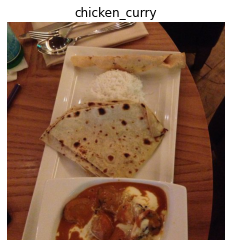

In [ ]:
img = view_random_image("food_dataset/train/","chicken_curry")

### Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                       rotation_range = 0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                               shuffle = True )

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             target_size = (224,224),
                                             class_mode = "categorical",
                                             shuffle = True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(-0.5, 223.5, 223.5, -0.5)

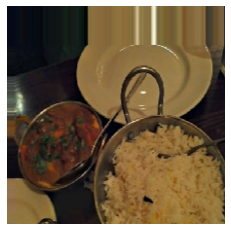

In [ ]:
# Seeing some augmented images

images,labels = train_data.next()

plt.imshow(images[0])
plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
# Making the model

# replicating the Tiny VGG model from CNN explainer

# setting the seed
tf.random.set_seed(42)

# Model Architecture

model = Sequential([
                    Conv2D(input_shape = (224,224,3),filters = 10 , kernel_size=3,activation="relu"),
                    Conv2D(10,3,activation = "relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation = "relu"),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10,activation="softmax")
])

In [ ]:
# compiling the model

model.compile(loss = "categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

In [ ]:
# Fitting the data

history = model.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data),
          
          validation_data = test_data,
          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 455ms/step - loss: 2.2822 - accuracy: 0.1312 - val_loss: 2.1924 - val_accuracy: 0.1824
Epoch 2/5
235/235 [==============================] - 107s 454ms/step - loss: 2.1864 - accuracy: 0.1850 - val_loss: 2.1058 - val_accuracy: 0.2252
Epoch 3/5
235/235 [==============================] - 107s 454ms/step - loss: 2.1169 - accuracy: 0.2296 - val_loss: 1.9796 - val_accuracy: 0.2892
Epoch 4/5
235/235 [==============================] - 107s 455ms/step - loss: 2.0372 - accuracy: 0.2804 - val_loss: 1.9220 - val_accuracy: 0.3220
Epoch 5/5
235/235 [==============================] - 107s 454ms/step - loss: 2.0248 - accuracy: 0.2851 - val_loss: 1.8804 - val_accuracy: 0.3436


In [ ]:
model.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.7816 - accuracy: 0.3888


[1.7816390991210938, 0.3887999951839447]

In [ ]:
# 38% accuracy. So the model is not guessing its learning something but the results are poor.
# Fine tuning the model can help.

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

no_of_epochs = range(len(history.history["loss"]))

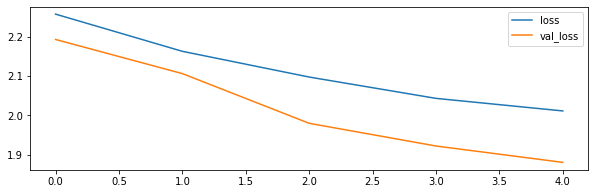

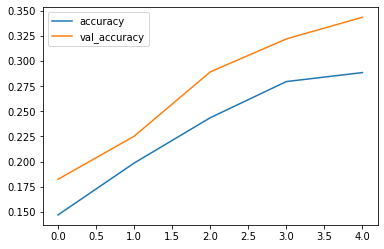

In [ ]:
plt.figure(figsize = (10,3))
plt.plot(no_of_epochs,loss,label = "loss")
plt.plot(no_of_epochs,val_loss , label = "val_loss")
plt.legend()


plt.figure()
plt.plot(no_of_epochs,accuracy,label = "accuracy")
plt.plot(no_of_epochs,val_accuracy,label = "val_accuracy")
plt.legend()

In [ ]:
# Function to predict

def load_image(file_name,input_shape = 224):

  # read file
  img = tf.io.read_file(file_name)

  # decode into tensor

  img = tf.image.decode_image(img)

  # resize 

  img = tf.image.resize(img,size = [input_shape,input_shape])

  # rescale 

  img = img/255.

  return img


# predict and plot funcution

def pred_and_plot(model,file_name,class_names = class_names):

  img = load_image(file_name)

  pred = model.predict(tf.expand_dims(img,axis = 0))

  pred_class = class_names[tf.argmax(pred[0])]

  plt.imshow(img)
  plt.title(pred_class)

  plt.axis("off")

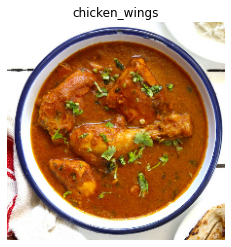

In [ ]:
# pred_and_plot(model,"cc111.jpg")

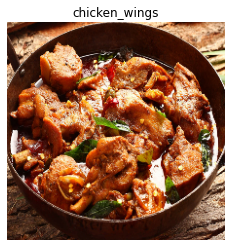

In [ ]:
# pred_and_plot(model,"cc222.jpg")

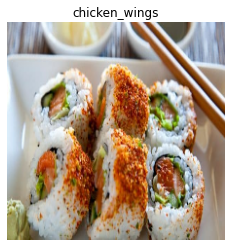

In [ ]:
# pred_and_plot(model,"sss222.jpg")

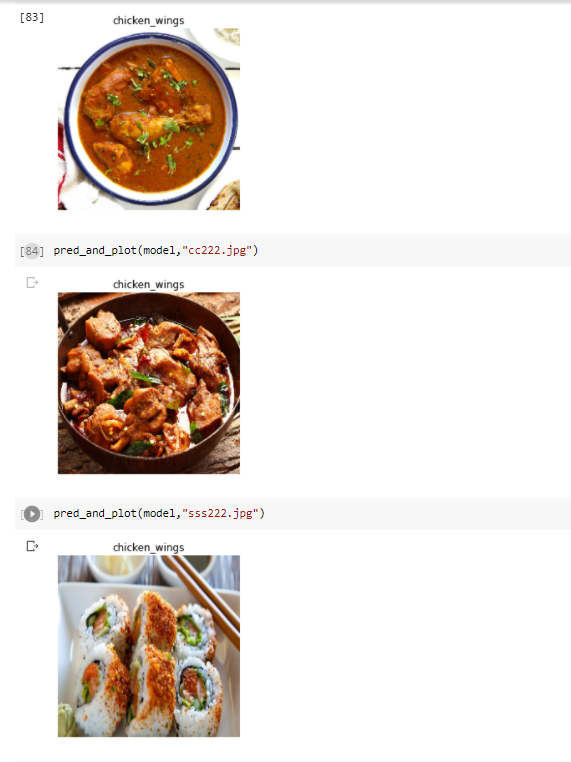

In [ ]:
# So we can see that our model gets some correct answers/.

# But it does get a lot of wrong answers as well.

# The model can be further improved by fine tuning or transfer learning.

# The above images show chicken wings for all three but we're getting different results too and this was just a conincidence.

In [ ]:
# Save the model

model.save("food_pred_1_39_percent_accuracy")

INFO:tensorflow:Assets written to: food_pred_1_39_percent_accuracy/assets


In [ ]:
# Loading the model

loaded_model = tf.keras.models.load_model("food_pred_1_39_percent_accuracy")


In [ ]:
# Evaluating loaded model

loaded_model.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.8804 - accuracy: 0.3436


[1.880430817604065, 0.34360000491142273]